In [1]:
#pip install python-binance

In [2]:
import pandas as pd
from binance.client import Client
import datetime as dt

#client configuration
api_key = 'API HERE'
api_secret = 'SECRET API HERE'
client = Client(api_key, api_secret)

<AxesSubplot:title={'center':'JASMY'}>

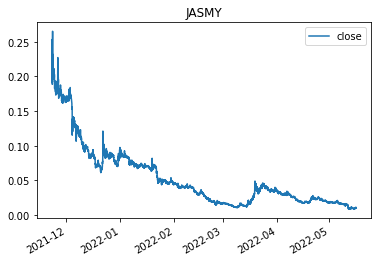

In [3]:
symbol = 'JASMYUSDT'
interval ='15m'

Client.KLINE_INTERVAL_15MINUTE

klines = client.get_historical_klines(symbol,interval,"1 Jan, 2021")

data = pd.DataFrame(klines)

#create column name

data.columns = ['open_time','open','high', 'low', 'close', 'volume',
               'close_time','gav','num_trades','taker_base_vol',
               'taker_quote_vol','ignore']

#change the time stamp
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]

data.to_csv(symbol+'.csv', index=None, header=True)

#convert data to float and plot
df=data.astype(float)
df['close'].plot(title='JASMY', legend='close')


In [4]:
import seaborn as sns
import pandas as pd

jasmy = pd.read_csv('JASMYUSDT.csv')

jasmy.describe()

,open_time,open,high,low,close,volume,close_time,gav,num_trades,taker_base_vol,taker_quote_vol,ignore
count,1.675500e+04,16755.000000,16755.000000,16755.000000,16755.000000,1.675500e+04,1.675500e+04,1.675500e+04,16755.000000,1.675500e+04,1.675500e+04,16755.0
mean,1.645122e+12,0.053110,0.053515,0.052712,0.053101,2.495260e+07,1.645123e+12,6.810329e+05,1181.837720,1.220694e+07,3.337034e+05,0.0
std,4.353207e+09,0.044197,0.044633,0.043837,0.044192,5.392727e+07,4.353207e+09,1.569571e+06,2404.778797,2.799835e+07,8.119133e+05,0.0
min,1.637582e+12,0.008500,0.008809,0.008200,0.008500,8.929000e+02,1.637583e+12,1.000048e+01,1.000000,0.000000e+00,0.000000e+00,0.0
25%,1.641352e+12,0.019800,0.019900,0.019600,0.019800,1.411196e+06,1.641353e+12,9.217159e+04,228.000000,6.288521e+05,3.930342e+04,0.0
50%,1.645122e+12,0.038000,0.038400,0.037500,0.038000,6.359502e+06,1.645123e+12,2.215071e+05,472.000000,2.717529e+06,1.011200e+05,0.0
75%,1.648891e+12,0.073200,0.073600,0.072600,0.073100,2.509888e+07,1.648892e+12,6.064512e+05,1157.000000,1.186520e+07,2.896072e+05,0.0
max,1.652661e+12,0.265100,0.364900,0.250000,0.265000,1.378931e+09,1.652662e+12,5.031286e+07,101551.000000,7.539999e+08,2.554606e+07,0.0


In [5]:
jasmy.head()

,open_time,open,high,low,close,volume,close_time,gav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1637582400000,0.1451,0.3649,0.1451,0.2526,180187903.7,1637583299999,5.031286e+07,101551,91659276.4,2.554606e+07,0
1,1637583300000,0.2525,0.2571,0.2176,0.2298,63341104.2,1637584199999,1.482262e+07,34181,27329838.6,6.426036e+06,0
2,1637584200000,0.2297,0.2380,0.2100,0.2290,42238678.5,1637585099999,9.441252e+06,23694,20201743.5,4.532010e+06,0
3,1637585100000,0.2288,0.2530,0.2265,0.2530,31805775.9,1637585999999,7.576200e+06,21520,18208585.8,4.344537e+06,0
4,1637586000000,0.2527,0.2649,0.2358,0.2427,49055838.8,1637586899999,1.226407e+07,33395,23851263.4,5.969346e+06,0


****PYTHON REQUESTS****

In [6]:
import requests
import json
import pandas as pd
import datetime as dt

In [9]:
url = 'https://api.binance.com/api/v3/klines'
symbol = 'ADAUSDT'
interval = '1h'
start = str(int(dt.datetime(2021,5,1).timestamp()*1000))
end= str(int(dt.datetime(2021,8,1).timestamp()*1000))

par = {'symbol':symbol, 'interval':interval, 'startTime':start,
      'endTime':end}

data = pd.DataFrame(json.loads(requests.get(url, params=par).text))
 #format columns name

data.columns=['datetime', 'open','high','low','close',
             'volume','close_time','qav', 'num_trades',
             'taker_base_vol', 'taker_quote_vol','ignore']

data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]

data=data.astype(float)

In [10]:
data.head()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2021-05-01 00:00:00,1.619798e+12,1.3535,1.3664,1.3481,1.3534,14854765.84,1.619802e+12,2.017852e+07,28518.0,7503527.49,1.019547e+07,0.0
2021-05-01 01:00:00,1.619802e+12,1.3534,1.3643,1.3487,1.3560,11947280.91,1.619806e+12,1.622183e+07,18508.0,6301922.17,8.560118e+06,0.0
2021-05-01 02:00:00,1.619806e+12,1.3559,1.3601,1.3463,1.3551,9745907.29,1.619809e+12,1.318920e+07,16198.0,4558276.94,6.169225e+06,0.0
2021-05-01 03:00:00,1.619809e+12,1.3552,1.3599,1.3515,1.3574,7561543.58,1.619813e+12,1.025143e+07,13356.0,4124158.35,5.591526e+06,0.0
2021-05-01 04:00:00,1.619813e+12,1.3573,1.3573,1.3400,1.3456,9960335.90,1.619816e+12,1.342049e+07,17281.0,4627857.30,6.235637e+06,0.0
